# Housing in Ireland: House Prices and House Loans Data 

<b> CA1 (14/04/2023) - MSc. in Data Analytics Feb 23

# Introduction
<p style='text-align: justify;'>A large amount of data is available on Ireland's Open Data Portal (data.gov.ie) to promote transparency throught the Irish Public Sector in an open, free and reusable format. The objective for the current assignment was to select a minimum of one dataset from the mentioned portal related to the theme Housing and formulate the appropriate questions for modelling and analysis. In other words, to collect, process, analyse and interpret the data in order to identify possible issues/problems at present and make predictions/classifications in regards to the future. 

Therefore, find presented on this Jupyter Notebook file all functions and modeling process to achieve this purpose using Python coding language. The chosen dataset files contain data about house prices and house loans by year (1975-2016) in Ireland. To perform an organised and clear understanding of the assignment timeline, Cross Industry Standard Process for Data Mining (CRISP-DM) Methodology was applied and the cells of code were grouped according to the following divisions: 

1. Business/Research Understanding Phase
2. Data Understanding Phase
3. Data Preparation Phase
4. Modeling Phase
5. Evaluation Phase
6. Deployment Phase

All cells bellow are commented with proper notes and more details can be found on the report file (ca1_2023063_report.docx) attached to the submission folder. </p>

# 1. Research Understanding Phase

- Define project requirements and objectives
- Translate objectives into data exploration problem definition
- Prepare preliminary strategy to meet objectives

<p style='text-align: justify;'>
As mentioned previously, the general objective for this assignment was to choose at least one dataset from the mentioned portal following the theme Housing and formulate the appropriate questions for modelling and analysis. Firstly, the data was read and cleaned with functions regarding to the imported libraries. Subsequently, Linear Regression and Random Forest models were applied to predict future house prices with overall model performance evaluation. </p>

# 2. Data Understanding Phase
This section of the notebook consists of importing libraries to better visualise and understand the data obtained from the chosen dataset files: data types, column names, data format, size, and others. 

- Collect data
- Perform exploratory data analysis (EDA) 
- Assess data quality
- Optionally, select interesting subsets

### 2.1 Importing libraries 
These are the libraries used to perform specific tasks without writing the functionalities from scratch.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') # To suppress the warnings

from sklearn.model_selection import train_test_split
!pip install chart_studio
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import plot 

#for offline plotting 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### 2.2 Reading and exploring dataset files with Pandas
Using functions to explore data from our 2 datasets:
- House Loans source link: https://data.gov.ie/dataset/hsq08-house-loans-approved-and-paid/resource/df29c807-f1fc-4596-9eb2-46dfb005c9d2
- House Prices source link: https://data.gov.ie/dataset/hsq06-average-price-of-houses/resource/eec93d2b-a0bf-4b59-bbbb-3839c95ac7e1 

### House loans dataset

In [2]:
# 2.2.1 Read the dataset file .csv with pandas 

loans_df = pd.read_csv("house_loans.csv")

In [3]:
# 2.2.2 Column names

loans_df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(Q1)', 'Quarter', 'C02350V02827',
       'House Type New or Second hand', 'UNIT', 'VALUE'],
      dtype='object')

In [4]:
# 2.2.3 First 5 rows of data

loans_df.head() 

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02350V02827,House Type New or Second hand,UNIT,VALUE
0,HSQ08C1,Number of House Loans Approved,19751,1975Q1,1,New houses,Number,3561.0
1,HSQ08C1,Number of House Loans Approved,19751,1975Q1,2,Second-hand houses,Number,1789.0
2,HSQ08C1,Number of House Loans Approved,19752,1975Q2,1,New houses,Number,4357.0
3,HSQ08C1,Number of House Loans Approved,19752,1975Q2,2,Second-hand houses,Number,2725.0
4,HSQ08C1,Number of House Loans Approved,19753,1975Q3,1,New houses,Number,3753.0


In [5]:
# 2.2.4 Last 5 rows of data

loans_df.tail() 

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02350V02827,House Type New or Second hand,UNIT,VALUE
1339,HSQ08C4,Value of House Loans Paid,20162,2016Q2,2,Second-hand houses,Euro Million,876.4
1340,HSQ08C4,Value of House Loans Paid,20163,2016Q3,1,New houses,Euro Million,283.3
1341,HSQ08C4,Value of House Loans Paid,20163,2016Q3,2,Second-hand houses,Euro Million,1095.5
1342,HSQ08C4,Value of House Loans Paid,20164,2016Q4,1,New houses,Euro Million,378.0
1343,HSQ08C4,Value of House Loans Paid,20164,2016Q4,2,Second-hand houses,Euro Million,1201.0


In [6]:
# 2.2.5 Dataframe shape (rows,columns)

loans_df.shape 

(1344, 8)

In [7]:
# 2.2.6 .info() returns information about the DataFrame.
# The information contains the number of columns, column labels, column data types, 
# memory usage, range index, and the number of cells in each column (non-null values)

loans_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STATISTIC                      1344 non-null   object 
 1   Statistic Label                1344 non-null   object 
 2   TLIST(Q1)                      1344 non-null   int64  
 3   Quarter                        1344 non-null   object 
 4   C02350V02827                   1344 non-null   int64  
 5   House Type New or Second hand  1344 non-null   object 
 6   UNIT                           1344 non-null   object 
 7   VALUE                          1344 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 84.1+ KB


In [8]:
# 2.2.7 Number of times a specified value appears in a string or a list

loans_df.count() 

STATISTIC                        1344
Statistic Label                  1344
TLIST(Q1)                        1344
Quarter                          1344
C02350V02827                     1344
House Type New or Second hand    1344
UNIT                             1344
VALUE                            1344
dtype: int64

In [9]:
# 2.2.8 Description of the numerical data in the DataFrame
"""
If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - Q1.
50% - Q2.
75% - Q3.
max - the maximum value.
"""
loans_df.describe()

,TLIST(Q1),C02350V02827,VALUE
count,1344.000000,1344.000000,1344.000000
mean,19957.500000,1.500000,3181.797321
std,121.259462,0.500186,3694.248800
min,19751.000000,1.000000,8.800000
25%,19852.750000,1.000000,267.300000
50%,19957.500000,1.500000,2109.150000
75%,20062.250000,2.000000,4259.750000
max,20164.000000,2.000000,18404.000000


In [10]:
# 2.2.8.1 Non-numerical data in the DataFrame

loans_df.describe(include=object)

,STATISTIC,Statistic Label,Quarter,House Type New or Second hand,UNIT
count,1344,1344,1344,1344,1344
unique,4,4,168,2,2
top,HSQ08C1,Number of House Loans Approved,1975Q1,New houses,Number
freq,336,336,8,672,672


In [11]:
# 2.2.9 Number of times the value is null

print(loans_df.isnull().sum()) 

STATISTIC                        0
Statistic Label                  0
TLIST(Q1)                        0
Quarter                          0
C02350V02827                     0
House Type New or Second hand    0
UNIT                             0
VALUE                            0
dtype: int64


In [12]:
# 2.2.10 Duplicated rows

duplicate_rows_df = loans_df[loans_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


### House prices dataset

In [13]:
# 2.2.11 Read dataset file .csv

house_prices = pd.read_csv("house_prices.csv")

In [14]:
# 2.2.12 Read column names

house_prices.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(Q1)', 'Quarter', 'C02343V02817',
       'Area', 'UNIT', 'VALUE'],
      dtype='object')

In [15]:
# 2.2.13 .head() 

house_prices.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE
0,HSQ06C1,New House Prices,19751,1975Q1,-,National,Euro,11887.0
1,HSQ06C1,New House Prices,19751,1975Q1,01,Dublin,Euro,11858.0
2,HSQ06C1,New House Prices,19751,1975Q1,02,Cork,Euro,10667.0
3,HSQ06C1,New House Prices,19751,1975Q1,03,Galway,Euro,13519.0
4,HSQ06C1,New House Prices,19751,1975Q1,04,Limerick,Euro,12565.0


In [16]:
# 2.2.14 .tail() 

house_prices.tail()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02343V02817,Area,UNIT,VALUE
2347,HSQ06C2,Second Hand House Prices,20164,2016Q4,02,Cork,Euro,247326.0
2348,HSQ06C2,Second Hand House Prices,20164,2016Q4,03,Galway,Euro,218284.0
2349,HSQ06C2,Second Hand House Prices,20164,2016Q4,04,Limerick,Euro,195324.0
2350,HSQ06C2,Second Hand House Prices,20164,2016Q4,05,Waterford,Euro,183151.0
2351,HSQ06C2,Second Hand House Prices,20164,2016Q4,06,Other areas,Euro,207253.0


In [17]:
# 2.2.15 .shape (rows,columns)

house_prices.shape 

(2352, 8)

In [18]:
# 2.2.16 .info() 

house_prices.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        2352 non-null   object 
 1   Statistic Label  2352 non-null   object 
 2   TLIST(Q1)        2352 non-null   int64  
 3   Quarter          2352 non-null   object 
 4   C02343V02817     2352 non-null   object 
 5   Area             2352 non-null   object 
 6   UNIT             2352 non-null   object 
 7   VALUE            2268 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 147.1+ KB


In [19]:
# 2.2.17 .count() 

house_prices.count() 

STATISTIC          2352
Statistic Label    2352
TLIST(Q1)          2352
Quarter            2352
C02343V02817       2352
Area               2352
UNIT               2352
VALUE              2268
dtype: int64

In [20]:
# 2.2.18 .describe() 

house_prices.describe()

,TLIST(Q1),VALUE
count,2352.000000,2268.000000
mean,19957.500000,137144.674162
std,121.240118,105517.303571
min,19751.000000,10667.000000
25%,19852.750000,46902.000000
50%,19957.500000,87355.000000
75%,20062.250000,222014.500000
max,20164.000000,549330.000000


In [21]:
# 2.2.18.1 Non-numerical data

house_prices.describe(include=object)

,STATISTIC,Statistic Label,Quarter,C02343V02817,Area,UNIT
count,2352,2352,2352,2352,2352,2352
unique,2,2,168,7,7,1
top,HSQ06C1,New House Prices,1975Q1,-,National,Euro
freq,1176,1176,14,336,336,2352


In [22]:
# 2.2.19 .isnull() 

print(house_prices.isnull().sum()) 

STATISTIC           0
Statistic Label     0
TLIST(Q1)           0
Quarter             0
C02343V02817        0
Area                0
UNIT                0
VALUE              84
dtype: int64


In [23]:
# 2.2.20 Duplicated rows

duplicate_rows_2 = house_prices[house_prices.duplicated()]
print("number of duplicate rows: ", duplicate_rows_2.shape)

number of duplicate rows:  (0, 8)


# 3. Data Preparation Phase

- Prepares for modeling in subsequent phases
- Select cases and variables appropriate for analysis
- Cleanse and prepare data so it is ready for modeling tools
- Perform transformation of certain variables, if needed

### 3.1 House prices dataframe

In [24]:
# 3.1.1 Drop columns
# house_prices2 is the dataframe house_prices without the columns "STATISTIC", "TLIST(Q1)","C02343V02817" and "UNIT"

house_prices2 = house_prices.drop({"STATISTIC","TLIST(Q1)","C02343V02817","UNIT"}, axis='columns')
house_prices2.drop(house_prices2[house_prices2["Area"] != "National"].index, inplace=True)

house_prices2.head()

,Statistic Label,Quarter,Area,VALUE
0,New House Prices,1975Q1,National,11887.0
7,New House Prices,1975Q2,National,12837.0
14,New House Prices,1975Q3,National,13269.0
21,New House Prices,1975Q4,National,13892.0
28,New House Prices,1976Q1,National,14738.0


In [26]:
# 3.1.2 Split "Statistic Label" into new dataframes 

newhouse_price = house_prices2[house_prices2["Statistic Label"]=="New House Prices"]

sechouse_price = house_prices2[house_prices2["Statistic Label"]=="Second Hand House Prices"]

In [27]:
newhouse_price

,Statistic Label,Quarter,Area,VALUE
0,New House Prices,1975Q1,National,11887.0
7,New House Prices,1975Q2,National,12837.0
14,New House Prices,1975Q3,National,13269.0
21,New House Prices,1975Q4,National,13892.0
28,New House Prices,1976Q1,National,14738.0
...,...,...,...,...
1141,New House Prices,2015Q4,National,298551.0
1148,New House Prices,2016Q1,National,309703.0
1155,New House Prices,2016Q2,National,314950.0
1162,New House Prices,2016Q3,National,304307.0


In [26]:
# 3.1.3 Reorganise values into columns 

newhouse_price2 = newhouse_price.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

sechouse_price2 = sechouse_price.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

In [27]:
# 3.1.4 Merge dataframes

houseprices_merge = pd.merge(newhouse_price2,sechouse_price2, how="outer")

houseprices_merge.head()

Statistic Label,Quarter,New House Prices,Second Hand House Prices
0,1975Q1,11887.0,NaN
1,1975Q2,12837.0,NaN
2,1975Q3,13269.0,NaN
3,1975Q4,13892.0,NaN
4,1976Q1,14738.0,NaN


In [28]:
# 3.1.5 NaN values

print(houseprices_merge.isnull().sum()) 

Statistic Label
Quarter                      0
New House Prices             0
Second Hand House Prices    12
dtype: int64


In [29]:
# 3.1.6 Loop on each Quarter value and clean it from the not desired characters (Q1, Q2...)
for quarter in houseprices_merge["Quarter"]:
    houseprices_merge['Quarter'] = houseprices_merge['Quarter'].replace([quarter], quarter.replace("Q1", "").replace("Q2", "").replace("Q3", "").replace("Q4", ""))

# Group the data by Quarter and values average .mean()
houseprices_merge = houseprices_merge.groupby(by=["Quarter"], as_index =False).mean()

In [30]:
# 3.1.7 Final dataframe for house prices data

houseprices_merge.head()

Statistic Label,Quarter,New House Prices,Second Hand House Prices
0,1975,12971.25,NaN
1,1976,15666.75,NaN
2,1977,18698.00,NaN
3,1978,24194.50,22058.25
4,1979,29452.00,27548.50


### 3.2 New houses loans dataframe

In [31]:
# 3.2.1 Dropping columns using .drop()
# loans_df2 is the loans_df dataframe without the columns "STATISTIC", "TLIST(Q1)","C02350V02827" and "UNIT"

loans_df2 = loans_df.drop({"STATISTIC","C02350V02827","TLIST(Q1)","UNIT"}, axis='columns')
loans_df2.head()

,Statistic Label,Quarter,House Type New or Second hand,VALUE
0,Number of House Loans Approved,1975Q1,New houses,3561.0
1,Number of House Loans Approved,1975Q1,Second-hand houses,1789.0
2,Number of House Loans Approved,1975Q2,New houses,4357.0
3,Number of House Loans Approved,1975Q2,Second-hand houses,2725.0
4,Number of House Loans Approved,1975Q3,New houses,3753.0


In [32]:
# 3.2.2 Filter New houses data and split it into 4 dataframes

newhouse_num_approved_df = loans_df2[loans_df2["Statistic Label"]=="Number of House Loans Approved"]
newhouse_num_approved_df = newhouse_num_approved_df[newhouse_num_approved_df["House Type New or Second hand"]=="New houses"]

newhouse_value_approved_df = loans_df2[loans_df2["Statistic Label"]=="Value of House Loans Approved"]
newhouse_value_approved_df = newhouse_value_approved_df[newhouse_value_approved_df["House Type New or Second hand"]=="New houses"]

newhouse_num_paid_df = loans_df2[loans_df2["Statistic Label"]=="Number of House Loans Paid"]
newhouse_num_paid_df = newhouse_num_paid_df[newhouse_num_paid_df["House Type New or Second hand"]=="New houses"]

newhouse_value_paid_df = loans_df2[loans_df2["Statistic Label"]=="Value of House Loans Paid"]
newhouse_value_paid_df = newhouse_value_paid_df[newhouse_value_paid_df["House Type New or Second hand"]=="New houses"]

In [33]:
# 3.2.3 Rearrange new dataframe values into columns using .pivot()

newhouse_num_approved_df2 = newhouse_num_approved_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

newhouse_value_approved_df2 = newhouse_value_approved_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

newhouse_num_paid_df2 = newhouse_num_paid_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

newhouse_value_paid_df2 = newhouse_value_paid_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()


In [34]:
# 3.2.4 Merge New houses dataframes using Outer Merge

newhouse_merge = pd.merge(newhouse_num_approved_df2,newhouse_value_approved_df2, how="outer")
newhouse_merge = pd.merge(newhouse_merge,newhouse_num_paid_df2, how="outer")
newhouse_merge = pd.merge(newhouse_merge,newhouse_value_paid_df2, how="outer")

In [35]:
# 3.2.5 Loop on each Quarter value and clean it from the not desired characters (Q1, Q2...)
for quarter in newhouse_merge["Quarter"]:
    newhouse_merge['Quarter'] = newhouse_merge['Quarter'].replace([quarter], quarter.replace("Q1", "").replace("Q2", "").replace("Q3", "").replace("Q4", ""))

# Group the data by Quarter and sum the values
newhouse_merge = newhouse_merge.groupby(by=["Quarter"], as_index =False).sum()

In [36]:
# 3.2.6 Create new columns value per loan

value_per_loan_approved = []
value_per_loan_paid = []

for index, row in newhouse_merge.iterrows():
   value_per_loan_approved.append(round((row['Value of House Loans Approved'] / row['Number of House Loans Approved']) * 1000000, 2))
   value_per_loan_paid.append(round((row['Value of House Loans Paid'] / row['Number of House Loans Paid']) * 1000000, 2))

newhouse_merge = newhouse_merge.assign(
  **{'Value per Loan Approved': value_per_loan_approved},
  **{'Value per Loan Paid': value_per_loan_paid}
)

In [37]:
# 3.2.7 Merge column prices to loans dataframe

newhouse_merge = newhouse_merge.merge(houseprices_merge[["Quarter", "New House Prices"]])

In [38]:
# 3.2.8 Update column name

newhouse_merge.rename(columns = {'Quarter':'Year'}, inplace = True)

In [39]:
# 3.2.9 Final result for new house dataframe

newhouse_merge.head()

Statistic Label,Year,Number of House Loans Approved,Value of House Loans Approved,Number of House Loans Paid,Value of House Loans Paid,Value per Loan Approved,Value per Loan Paid,New House Prices
0,1975,15457.0,115.2,13932.0,92.2,7452.93,6617.86,12971.25
1,1976,13712.0,129.9,13228.0,103.1,9473.45,7794.07,15666.75
2,1977,12508.0,137.1,12207.0,110.1,10960.98,9019.42,18698.00
3,1978,14215.0,187.5,11759.0,140.8,13190.29,11973.81,24194.50
4,1979,15833.0,244.0,12702.0,182.2,15410.85,14344.20,29452.00


In [40]:
# 3.2.10 Final new houses dataframe description

newhouse_merge.describe()

Statistic Label,Number of House Loans Approved,Value of House Loans Approved,Number of House Loans Paid,Value of House Loans Paid,Value per Loan Approved,Value per Loan Paid,New House Prices
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,19555.809524,2426.995238,18425.142857,2035.880952,102523.866429,94451.649048,134943.982143
std,14064.044012,3571.717987,13586.064021,3011.851891,85219.043317,80808.927094,101715.551937
min,2960.000000,115.200000,2522.000000,92.200000,7452.930000,6617.860000,12971.250000
25%,11595.750000,334.625000,10527.750000,305.325000,29053.985000,27646.075000,47008.875000
50%,14393.500000,737.800000,12899.000000,612.300000,59777.980000,49438.130000,82627.500000
75%,28564.500000,2654.500000,26923.250000,2173.375000,181731.607500,171356.510000,228331.062500
max,58104.000000,13994.700000,55737.000000,11649.500000,260769.930000,263804.310000,321615.750000


<b> Note:</b> from topic <b>3.1.1</b> to <b>3.1.5</b> we have reorganised the data related to <b>New Houses</b>. Therefore, on the following topics we are going to do the same steps to reorganise the <b>Second-hand Houses</b> related data.

### 3.3 Second-hand house loans dataframe

In [41]:
# 3.3.1 Filter Second-hand houses and split it into 4 dataframes

sechouse_num_approved_df = loans_df2[loans_df2["Statistic Label"]=="Number of House Loans Approved"]
sechouse_num_approved_df = sechouse_num_approved_df[sechouse_num_approved_df["House Type New or Second hand"]=="Second-hand houses"]

sechouse_value_approved_df = loans_df2[loans_df2["Statistic Label"]=="Value of House Loans Approved"]
sechouse_value_approved_df = sechouse_value_approved_df[sechouse_value_approved_df["House Type New or Second hand"]=="Second-hand houses"]

sechouse_num_paid_df = loans_df2[loans_df2["Statistic Label"]=="Number of House Loans Paid"]
sechouse_num_paid_df = sechouse_num_paid_df[sechouse_num_paid_df["House Type New or Second hand"]=="Second-hand houses"]

sechouse_value_paid_df = loans_df2[loans_df2["Statistic Label"]=="Value of House Loans Paid"]
sechouse_value_paid_df = sechouse_value_paid_df[sechouse_value_paid_df["House Type New or Second hand"]=="Second-hand houses"]

In [42]:
# 3.3.2 Rearrange values into columns using .pivot()

sechouse_num_approved_df2 = sechouse_num_approved_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

sechouse_value_approved_df2 = sechouse_value_approved_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

sechouse_num_paid_df2 = sechouse_num_paid_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

sechouse_value_paid_df2 = sechouse_value_paid_df.pivot(index="Quarter", columns="Statistic Label", values="VALUE").reset_index()

In [43]:
# 3.3.3 Merge Second-hand Houses dataframes using Outer Merge

sechouse_merge = pd.merge(sechouse_num_approved_df2,sechouse_value_approved_df2, how="outer")
sechouse_merge = pd.merge(sechouse_merge,sechouse_num_paid_df2, how="outer")
sechouse_merge = pd.merge(sechouse_merge,sechouse_value_paid_df2, how="outer")

In [44]:
# 3.3.4 Loop on each Quarter value and clean it from the not desired characters (Q1, Q2...)
for quarter in sechouse_merge["Quarter"]:
    sechouse_merge['Quarter'] = sechouse_merge['Quarter'].replace([quarter], quarter.replace("Q1", "").replace("Q2", "").replace("Q3", "").replace("Q4", ""))

# Group the data by Quarter and sum the values
sechouse_merge = sechouse_merge.groupby(by=["Quarter"], as_index =False).sum()

In [45]:
# 3.3.5 Create new columns value per loan

value_per_loan_approved = []
value_per_loan_paid = []

for index, row in sechouse_merge.iterrows():
   value_per_loan_approved.append(round((row['Value of House Loans Approved'] / row['Number of House Loans Approved']) * 1000000, 2))
   value_per_loan_paid.append(round((row['Value of House Loans Paid'] / row['Number of House Loans Paid']) * 1000000, 2))

sechouse_merge = sechouse_merge.assign(
  **{'Value per Loan Approved': value_per_loan_approved},
  **{'Value per Loan Paid': value_per_loan_paid}
)

In [46]:
# 3.3.6 Merge column prices to loans dataframe

sechouse_merge = sechouse_merge.merge(houseprices_merge[["Quarter", "Second Hand House Prices"]])

In [47]:
# 3.3.7 Update column name

sechouse_merge.rename(columns = {'Quarter':'Year'}, inplace = True)

In [48]:
# 3.3.8 Final result for second-hand house dataframe

sechouse_merge.head()

Statistic Label,Year,Number of House Loans Approved,Value of House Loans Approved,Number of House Loans Paid,Value of House Loans Paid,Value per Loan Approved,Value per Loan Paid,Second Hand House Prices
0,1975,10412.0,85.5,7309.0,55.5,8211.68,7593.38,NaN
1,1976,11528.0,112.8,8823.0,82.5,9784.87,9350.56,NaN
2,1977,12032.0,140.1,9832.0,107.8,11643.95,10964.20,NaN
3,1978,12562.0,170.8,10889.0,142.9,13596.56,13123.34,22058.25
4,1979,14218.0,230.3,12040.0,189.1,16197.78,15705.98,27548.50


In [49]:
# 3.3.9 Final sechouse_merge description

sechouse_merge.describe()

Statistic Label,Number of House Loans Approved,Value of House Loans Approved,Number of House Loans Paid,Value of House Loans Paid,Value per Loan Approved,Value per Loan Paid,Second Hand House Prices
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,39.000000
mean,28376.666667,3595.735714,24495.976190,2905.307143,104192.005000,98797.824048,156235.108974
std,15088.494917,4356.189279,13867.677428,3556.403904,91730.678778,85948.726452,115831.669267
min,9874.000000,47.200000,7309.000000,55.500000,2690.690000,7593.380000,22058.250000
25%,15019.750000,541.000000,12539.750000,458.525000,28049.905000,27832.000000,48849.750000
50%,27493.500000,1685.150000,19811.000000,1416.150000,55253.645000,51764.760000,102447.500000
75%,34301.250000,5217.200000,30349.000000,3713.150000,192840.012500,174650.142500,263249.500000
max,61933.000000,17387.500000,55516.000000,14493.800000,287805.040000,286683.640000,377041.750000


### 3.4 Plotting charts 

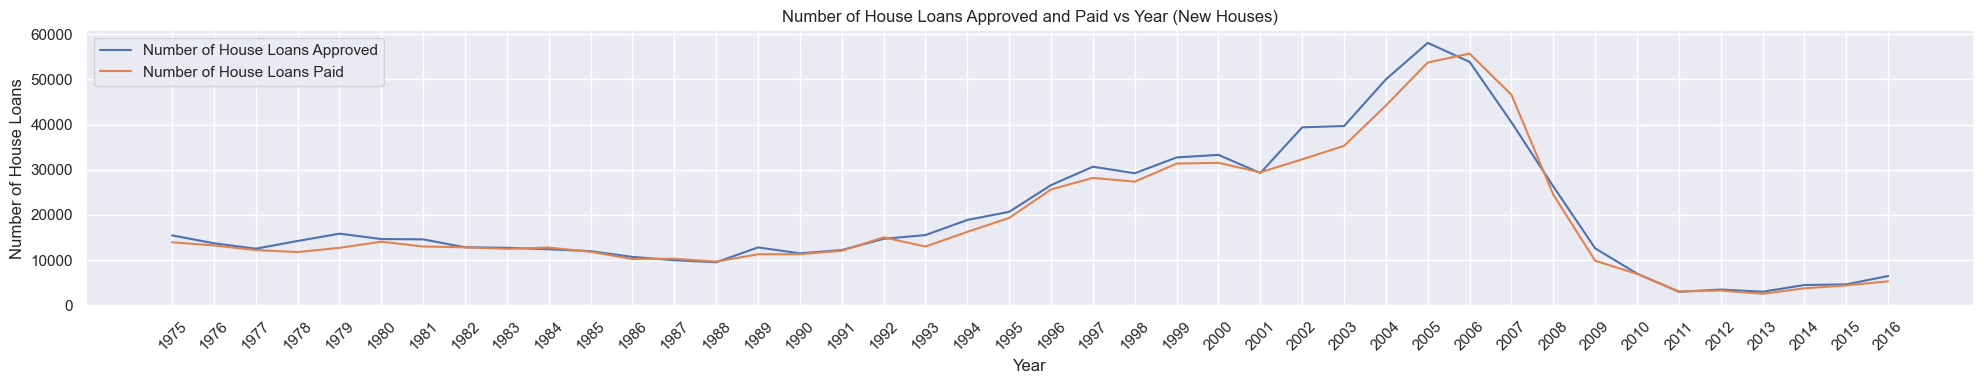

In [84]:
# 3.4.1 Overall number of house loans approved vs paid (new houses)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define the "Number of House Loans Approved" plot
ax.plot(newhouse_merge["Year"], newhouse_merge["Number of House Loans Approved"],label="Number of House Loans Approved")
# Define the "Number of House Loans Paid" plot
ax.plot(newhouse_merge["Year"], newhouse_merge["Number of House Loans Paid"],label="Number of House Loans Paid")

# Configuration of the graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Number of House Loans Approved and Paid vs Year (New Houses)")
plt.xlabel("Year")
plt.ylabel("Number of House Loans")
plt.xticks(rotation=45)
ax.legend(loc="upper left")

# Display the graphic
plt.show()

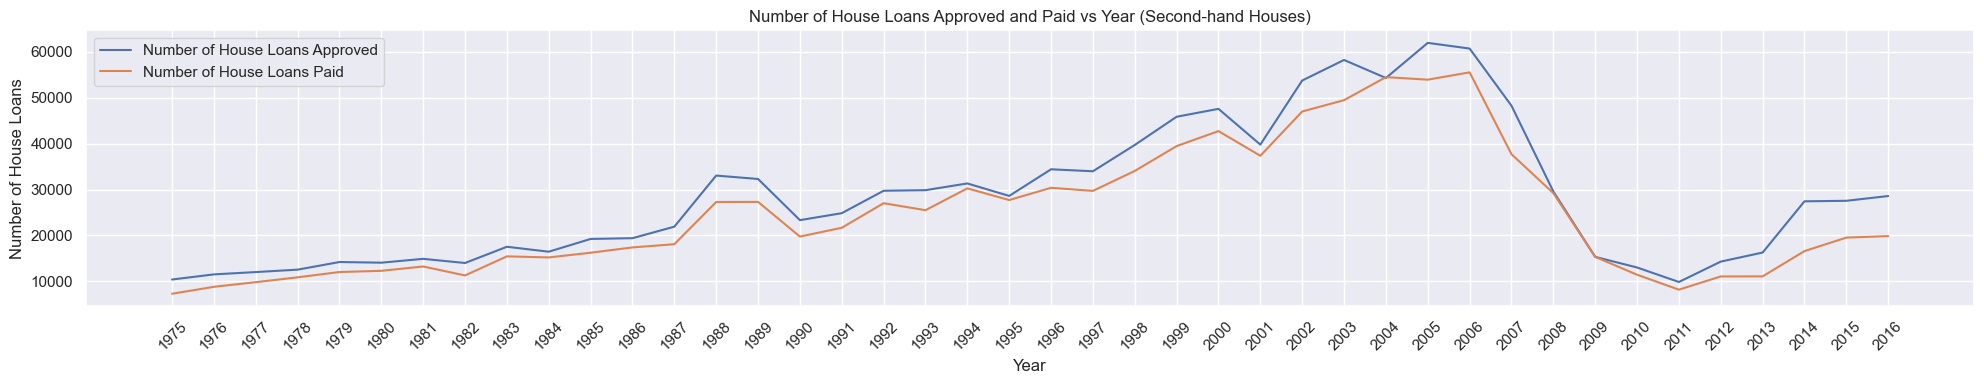

In [85]:
# 3.4.2 Overall number of house loans approved vs paid (second-hand houses)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define the "Number of House Loans Approved" plot
ax.plot(sechouse_merge["Year"], sechouse_merge["Number of House Loans Approved"],label="Number of House Loans Approved")
# Define the "Number of House Loans Paid" plot
ax.plot(sechouse_merge["Year"], sechouse_merge["Number of House Loans Paid"],label="Number of House Loans Paid")

# Configuration of the graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("Number of House Loans Approved and Paid vs Year (Second-hand Houses)")
plt.xlabel("Year")
plt.ylabel("Number of House Loans")
plt.xticks(rotation=45)
ax.legend(loc="upper left")

# Display the graphic
plt.show()

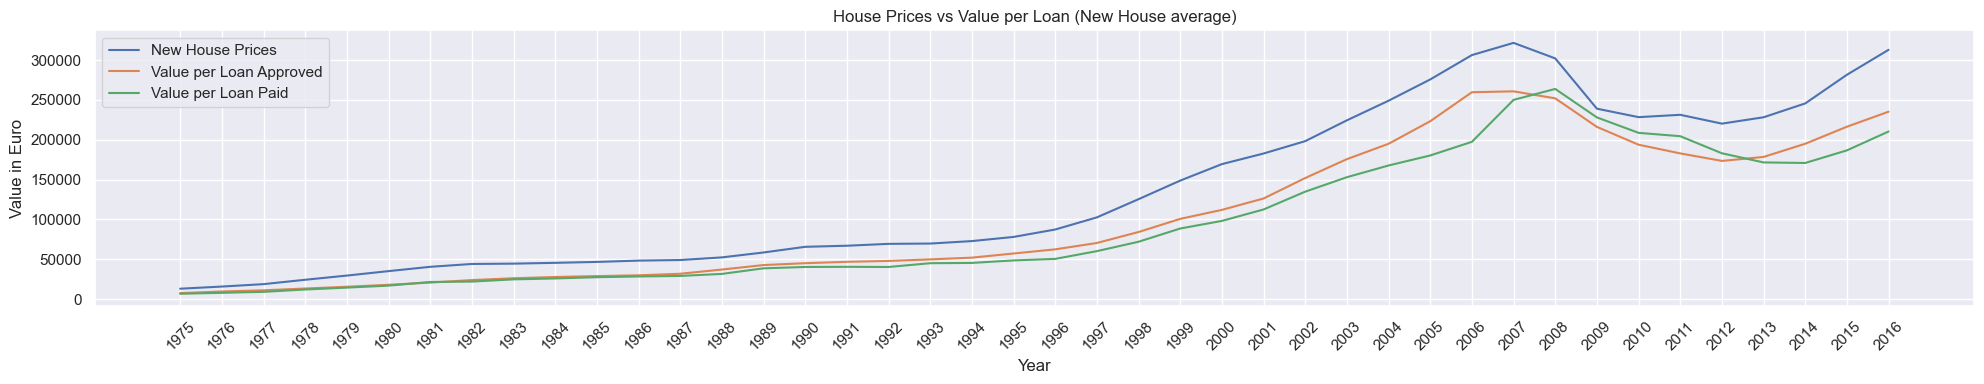

In [86]:
# 3.4.3 House price vs Value per loan (new house)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define the "Value of House Loans Approved" plot
ax.plot(newhouse_merge["Year"], newhouse_merge["New House Prices"], label="New House Prices")
ax.plot(newhouse_merge["Year"], newhouse_merge["Value per Loan Approved"], label="Value per Loan Approved")
ax.plot(newhouse_merge["Year"], newhouse_merge["Value per Loan Paid"], label="Value per Loan Paid")


# Configuration of the graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("House Prices vs Value per Loan (New House average)")
plt.xlabel("Year")
plt.ylabel("Value in Euro")
plt.xticks(rotation=45)
ax.legend(loc="upper left")

# Display the graphic
plt.show()

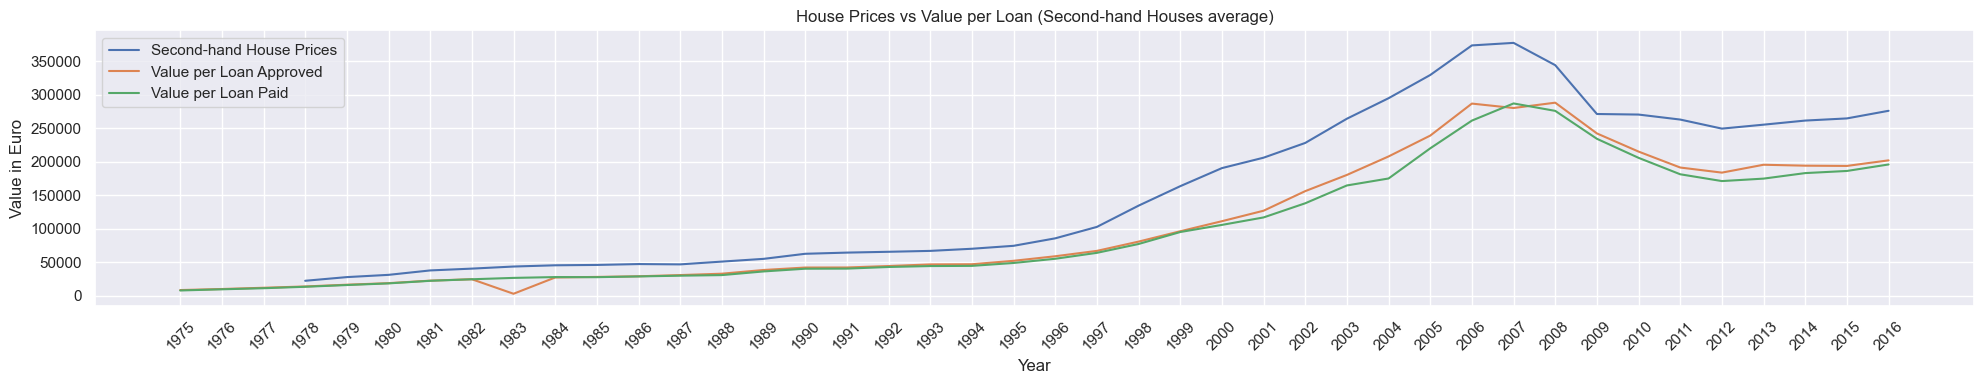

In [87]:
# 3.4.4 House price vs Value per loan (second-hand house)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Define the "Value of House Loans Approved" plot
ax.plot(sechouse_merge["Year"], sechouse_merge["Second Hand House Prices"], label="Second-hand House Prices")
ax.plot(sechouse_merge["Year"], sechouse_merge["Value per Loan Approved"], label="Value per Loan Approved")
ax.plot(sechouse_merge["Year"], sechouse_merge["Value per Loan Paid"], label="Value per Loan Paid")


# Configuration of the graphic
plt.rc("figure", autolayout=True, figsize=(20, 4))
plt.title("House Prices vs Value per Loan (Second-hand Houses average)")
plt.xlabel("Year")
plt.ylabel("Value in Euro")
plt.xticks(rotation=45)
ax.legend(loc="upper left")

# Display the graphic
plt.show()

<AxesSubplot:xlabel='Statistic Label', ylabel='Statistic Label'>

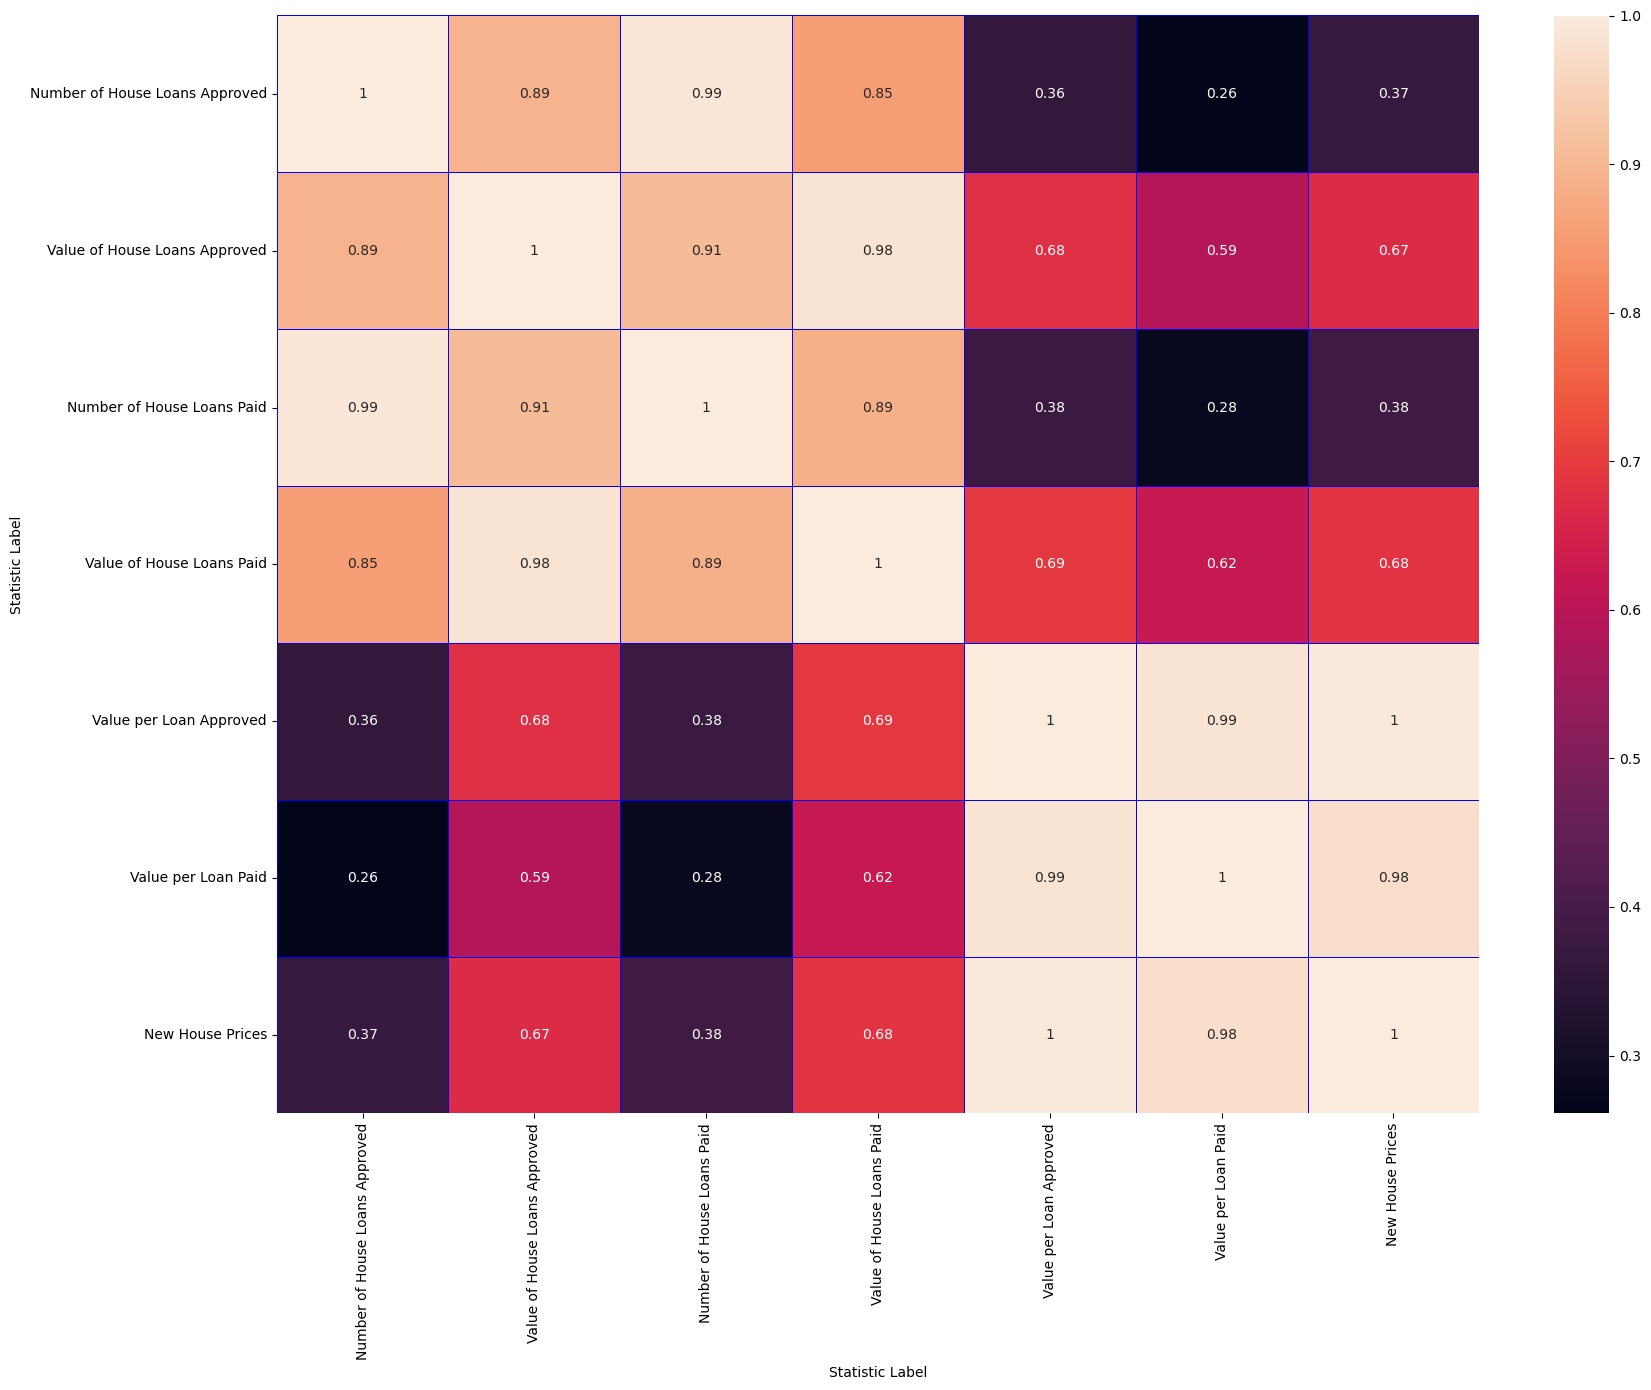

In [54]:
# 3.4.5 Heatmap correlation between features

plt.figure(figsize=(18,14))
newhouse_correlation = newhouse_merge.corr()
sns.heatmap(newhouse_correlation,annot=True,linecolor="blue",lw=0.5)

# 4. Modeling Phase

- Select and apply one or more modeling techniques
- Calibrate model settings to optimize results

### 4.1 Create X and y, train test split

In [55]:
# 4.1.1 Create X and y objects
X = np.array(newhouse_merge.index).reshape(-1,1)
y = newhouse_merge["New House Prices"]


# 4.1.2 Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)


# 4.1.3 .shape
print("X train: ",X_train.shape), print("X test: ",X_test.shape), print("y train: ",y_train.shape), print("y test: ",y_test.shape) 

X train:  (29, 1)
X test:  (13, 1)
y train:  (29,)
y test:  (13,)


(None, None, None, None)

### 4.2 Linear Regression

In [56]:
# 4.2.1 Import library

from sklearn.linear_model import LinearRegression 

In [57]:
# 4.2.2 Fit model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# 4.2.3 Plot actual and predicted values for train dataset

# Set layout to plot
layout = go.Layout(
    title={
         'text': 'New House Prices (Predicted vs Actual values)',
         'y':0.9,
         'x':0.5,
         'xanchor': 'center',
         'yanchor': 'top'
        }, 
    xaxis=dict(
        title="Year", 
        titlefont=dict(
            family='Courier New, monospace', 
            size=15
        )
    ), 
    yaxis=dict(
        title='Price', 
        titlefont=dict(
            family='Courier New, monospace', 
            size=15 
        )
    )
)

trace0 = go.Scatter(
    x = X_train.T[0],
    y = y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lr_model.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
newhouse_merge_data = [trace0, trace1]
layout.xaxis.title.text = "Year"
plot2= go.Figure(data=newhouse_merge_data, layout=layout)

iplot(plot2)

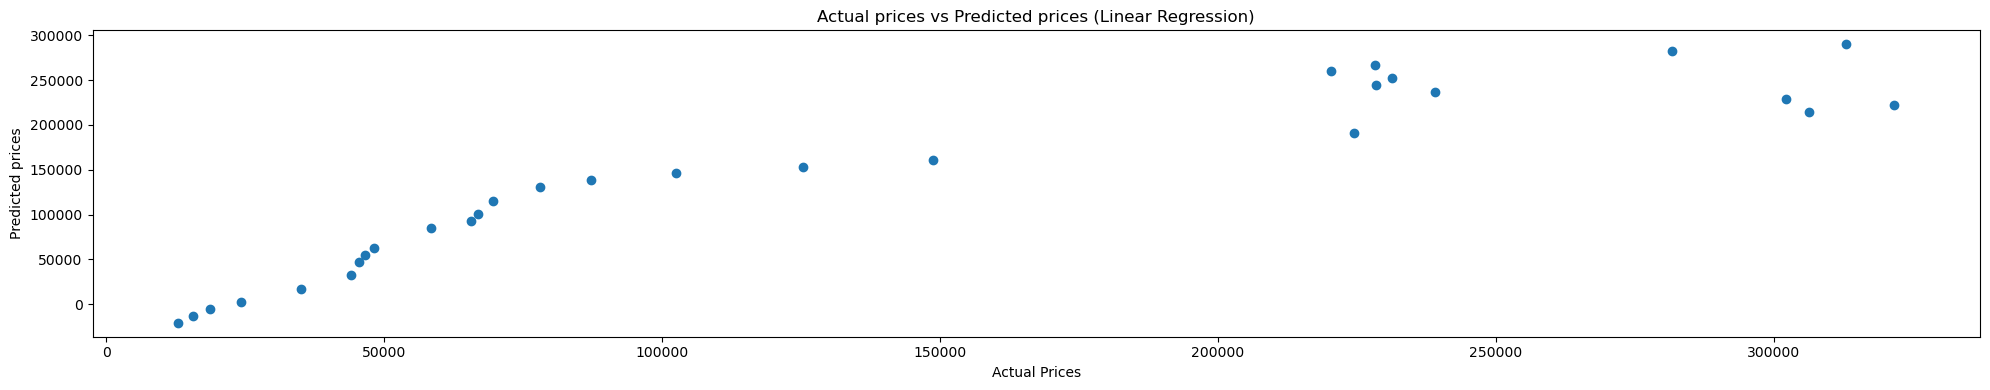

In [59]:
# 4.2.4 Correlation between actual and predicted values

plt.scatter(y_train, lr_model.predict(X_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Linear Regression)")
plt.show()

### 4.3 Random Forest

In [60]:
# 4.3.1 Import library

from sklearn.ensemble import RandomForestRegressor

In [61]:
# 4.3.2 Fit model

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

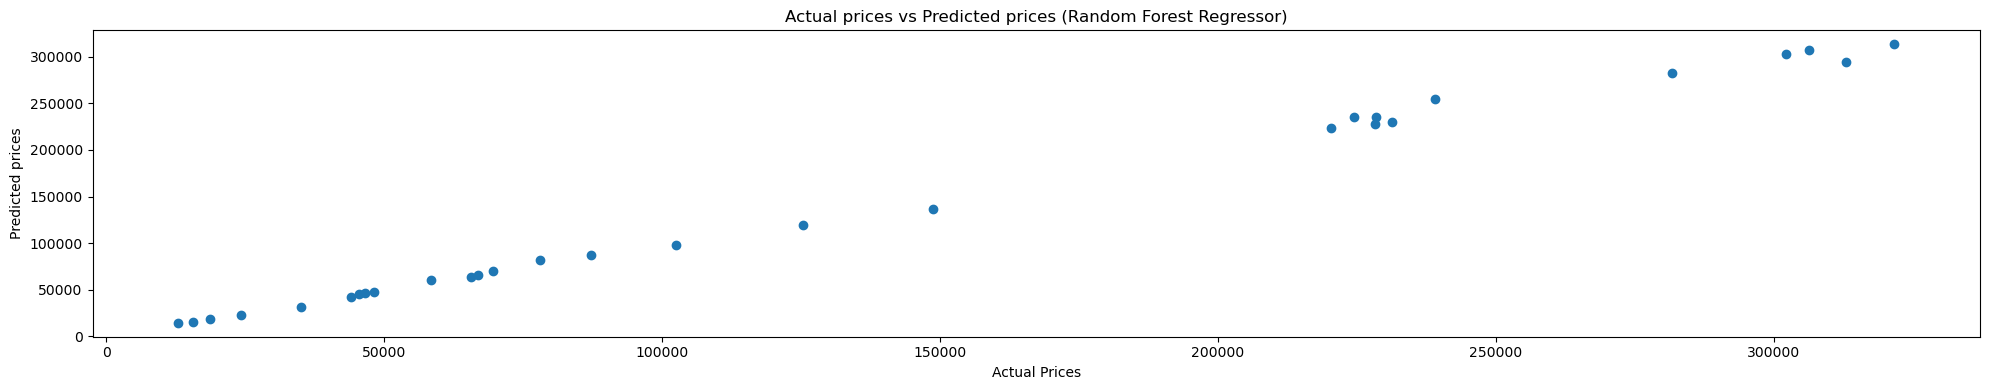

In [62]:
# 4.3.3 Correlation between actual and predicted values

plt.scatter(y_train, rf_model.predict(X_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Random Forest Regressor)")
plt.show()

### 4.4 Ridge Regression

In [63]:
# 4.4.1 Import library

from sklearn.linear_model import Ridge
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

In [64]:
# 4.4.2 Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)


# 4.4.3 Fit model
ridgeregr.fit(X_train, y_train)
ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


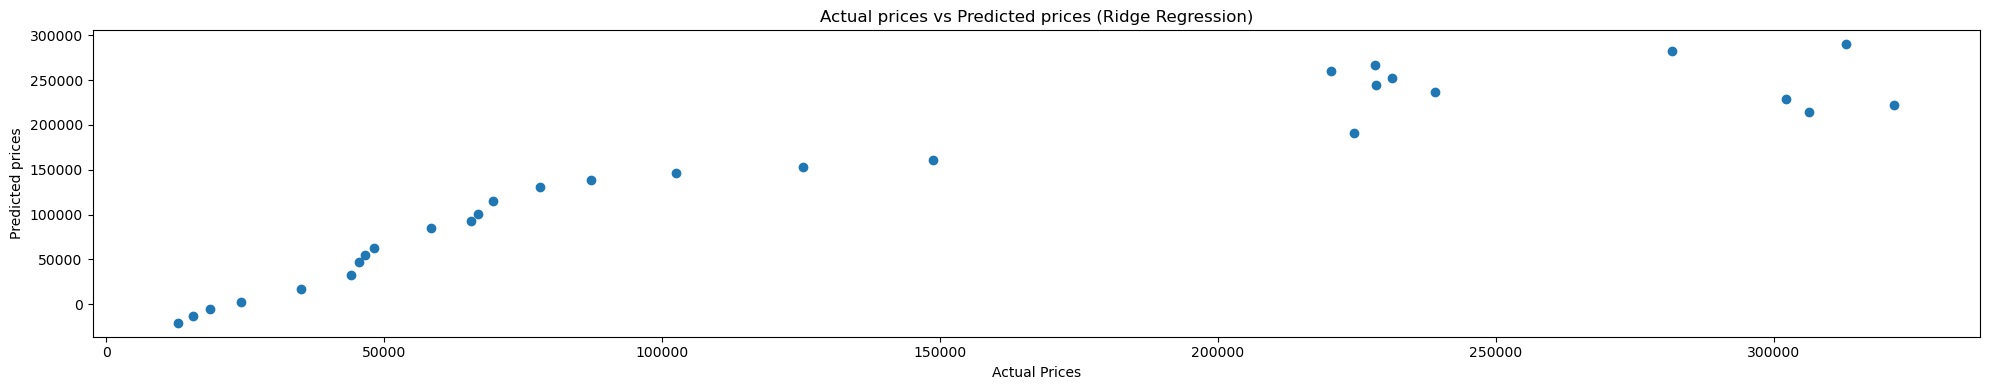

In [65]:
# 4.4.4 Correlation between actual and predicted values

plt.scatter(y_train, ridge.predict(X_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Ridge Regression)")
plt.show()

### 4.5 Lasso Regression

In [66]:
# 4.5.1 Import library


from sklearn.linear_model import Lasso

In [67]:
# 4.5.2 Use GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

# 4.5.3 Fit model
lassoregr.fit(X_train, y_train)
lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


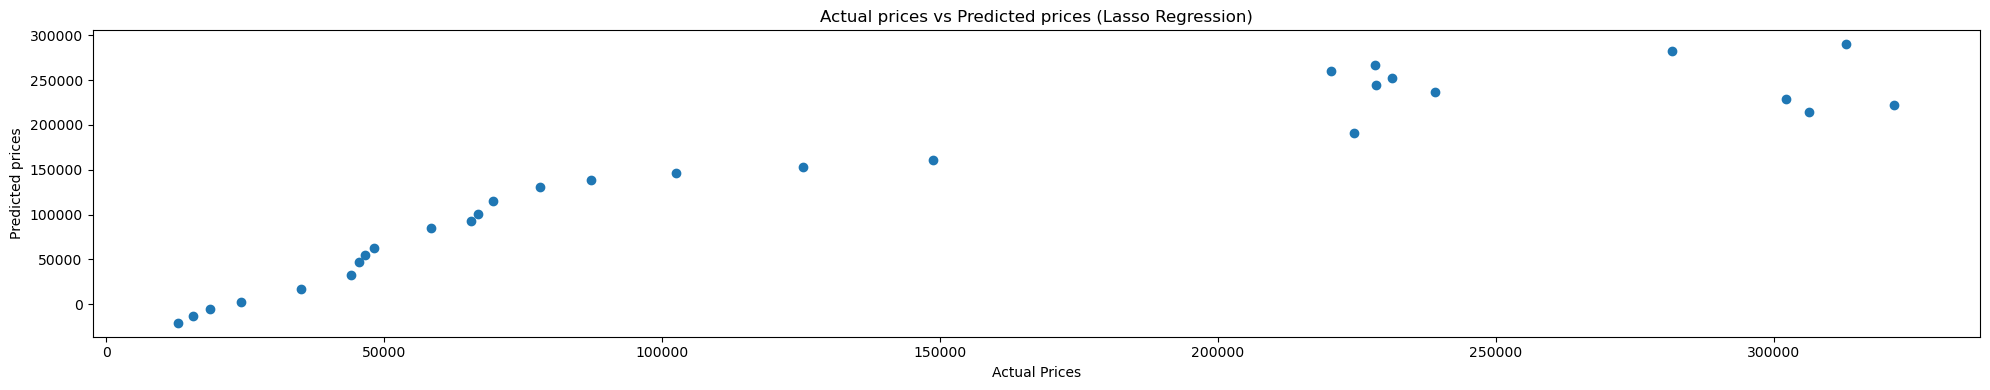

In [68]:
# 4.5.4 Correlation between actual and predicted values

plt.scatter(y_train, lasso.predict(X_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Lasso Regression)")
plt.show()

### 4.6 Decision Tree Regressor

In [69]:
# 4.6.1 Import library

from sklearn.tree import DecisionTreeRegressor

In [70]:
# 4.6.2 Fit model

DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

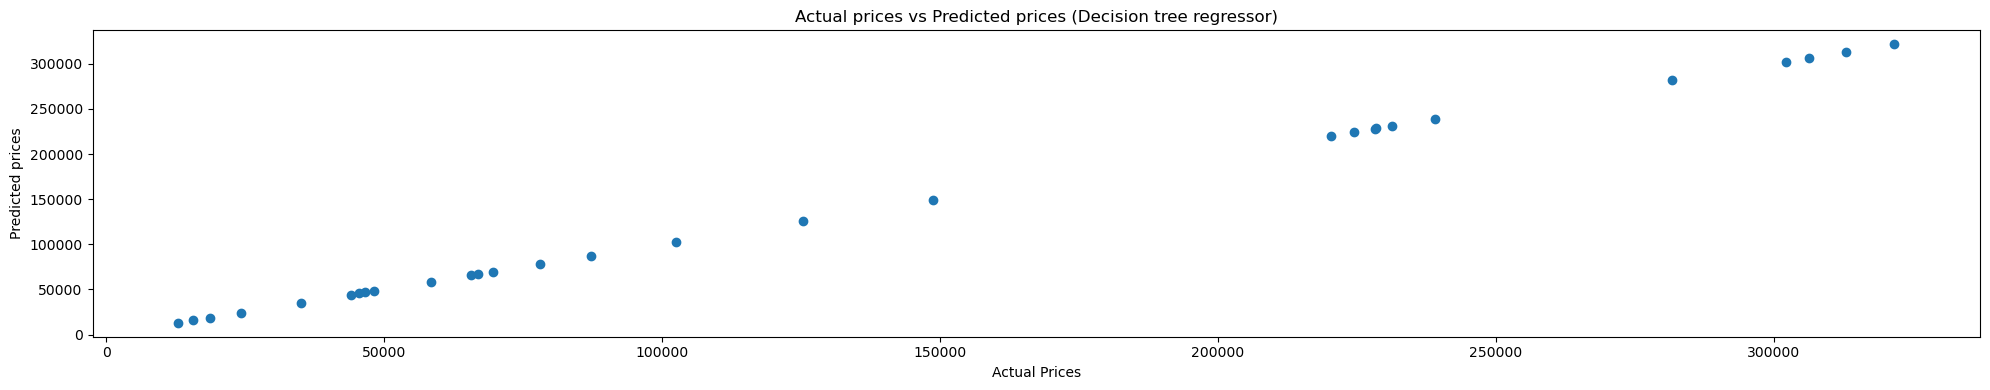

In [71]:
# 4.6.3 Correlation between actual and predicted values

plt.scatter(y_train, DTregressor.predict(X_train))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices (Decision tree regressor)")
plt.show()

# 5. Evaluation Phase

- Evaluate one or more models for effectiveness
- Determine whether defined objectives
achieved
- Make decision regarding data exploration results before deploying to field

### 5.1 Linear Regression Score

In [72]:
# R2,Mean Squared Error, Mean Absolute Error and Intercept

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# R2: variance of the dependent variable, explained by the independent variables (features).
# How well the model fits the data. Higher is better
lr_r2_train = r2_score(y_train, lr_model.predict(X_train))
lr_r2_test = r2_score(y_test, lr_model.predict(X_test))

# MSE: Average Squared distance between the predicted and actual values. Lower is better
lr_mse_train = mean_squared_error(y_train, lr_model.predict(X_train))
lr_mse_test = mean_squared_error(y_test, lr_model.predict(X_test))

# RMSE Root Mean Square Error
lr_rmse_train = math.sqrt(lr_mse_train)
lr_rmse_test = math.sqrt(lr_mse_test)

# MAE: Average absolute distance between the predicted and actual values. Lower is better
lr_mae_train = mean_absolute_error(y_train, lr_model.predict(X_train))
lr_mae_test = mean_absolute_error(y_test, lr_model.predict(X_test))


# Intercept: starting point of the regression line on the y-axis.
# Value of dependent variable when the independent variables (features) are zero.
# If positive number, target increases as features increase, if negative - opposite
intercept = lr_model.intercept_

print("R2 score train: ",lr_r2_train)
print("R2 score test: ",lr_r2_test)
print("Mean Squared Error train MSE: ", lr_mse_train)
print("Mean Squared Error test MSE: ", lr_mse_test)
print("Root Mean Squared Error train RMSE: ", lr_rmse_train)
print("Root Mean Squared Error test RMSE: ", lr_rmse_test)
print("Mean Absolute Error train: ", lr_mae_train)
print("Mean Absolute Error test: ", lr_mae_test)
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - lr_model.predict(X_test)) / y_test)) * 100))
print("Intercept: ",intercept)

R2 score train:  0.8569622897179192
R2 score test:  0.8618613785659232
Mean Squared Error train MSE:  1582295708.8765237
Mean Squared Error test MSE:  1091764973.257999
Root Mean Squared Error train RMSE:  39778.08075908796
Root Mean Squared Error test RMSE:  33041.86697597457
Mean Absolute Error train:  31861.356222516555
Mean Absolute Error test:  26619.981641039314
Mean absolute percentage error of the prediction is: 30.960821343679555
Intercept:  -20799.042009451427


### 5.2 Random Forest Score

In [73]:

rf_r2_train = r2_score(y_train, rf_model.predict(X_train))
rf_r2_test = r2_score(y_test, rf_model.predict(X_test))
rf_mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
rf_mse_test = mean_squared_error(y_test, rf_model.predict(X_test))
rf_rmse_train = math.sqrt(rf_mse_train)
rf_rmse_test = math.sqrt(rf_mse_test)
rf_mae_train = mean_absolute_error(y_train, rf_model.predict(X_train))
rf_mae_test = mean_absolute_error(y_test, rf_model.predict(X_test))

print("R2 score train: ",rf_r2_train)
print("R2 score test: ",rf_r2_test)
print("Mean Squared Error train MSE: ", rf_mse_train)
print("Mean Squared Error test MSE: ", rf_mse_test)
print("Root Mean Squared Error train RMSE: ", rf_rmse_train)
print("Root Mean Squared Error test RMSE: ", rf_rmse_test)
print("Mean Absolute Error train: ", rf_mae_train)
print("Mean Absolute Error test: ", rf_mae_test)
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - rf_model.predict(X_test)) / y_test)) * 100))


R2 score train:  0.9966606525740499
R2 score test:  0.9882976782420607
Mean Squared Error train MSE:  36940154.397806026
Mean Squared Error test MSE:  92488146.09902692
Root Mean Squared Error train RMSE:  6077.841261320176
Root Mean Squared Error test RMSE:  9617.075756123944
Mean Absolute Error train:  3727.6036206896542
Mean Absolute Error test:  5984.4376923076925
Mean absolute percentage error of the prediction is: 5.081268717297281


### 5.3 Rigde Regression Score

In [74]:
rr_r2_train = r2_score(y_train, ridge.predict(X_train))
rr_r2_test = r2_score(y_test, ridge.predict(X_test))
rr_mse_train = mean_squared_error(y_train, ridge.predict(X_train))
rr_mse_test = mean_squared_error(y_test, ridge.predict(X_test))
rr_rmse_train = math.sqrt(rr_mse_train)
rr_rmse_test = math.sqrt(rr_mse_test)
rr_mae_train = mean_absolute_error(y_train, ridge.predict(X_train))
rr_mae_test = mean_absolute_error(y_test, ridge.predict(X_test))

print("R2 score train: ",rr_r2_train)
print("R2 score test: ",rr_r2_test)
print("Mean Squared Error train MSE: ", rr_mse_train)
print("Mean Squared Error test MSE: ", rr_mse_test)
print("Root Mean Squared Error train RMSE: ", rr_rmse_train)
print("Root Mean Squared Error test RMSE: ", rr_rmse_test)
print("Mean Absolute Error train: ", rr_mae_train)
print("Mean Absolute Error test: ", rr_mae_test)
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - ridge.predict(X_test))/y_test)) * 100))


R2 score train:  0.8569622523318566
R2 score test:  0.8618417730358082
Mean Squared Error train MSE:  1582296122.444431
Mean Squared Error test MSE:  1091919923.632047
Root Mean Squared Error train RMSE:  39778.085957527306
Root Mean Squared Error test RMSE:  33044.21165093891
Mean Absolute Error train:  31857.670934200793
Mean Absolute Error test:  26619.045333993734
Mean absolute percentage error of the prediction is: 30.95178228479111


### 5.4 Lasso Regression Score

In [75]:
la_r2_train = r2_score(y_train, lasso.predict(X_train))
la_r2_test = r2_score(y_test, lasso.predict(X_test))
la_mse_train = mean_squared_error(y_train, lasso.predict(X_train))
la_mse_test = mean_squared_error(y_test, lasso.predict(X_test))
la_rmse_train = math.sqrt(la_mse_train)
la_rmse_test = math.sqrt(la_mse_test)
la_mae_train = mean_absolute_error(y_train, lasso.predict(X_train))
la_mae_test = mean_absolute_error(y_test, lasso.predict(X_test))

print("R2 score train: ",la_r2_train)
print("R2 score test: ",la_r2_test)
print("Mean Squared Error train MSE: ", la_mse_train)
print("Mean Squared Error test MSE: ", la_mse_test)
print("Root Mean Squared Error train RMSE: ", la_rmse_train)
print("Root Mean Squared Error test RMSE: ", la_rmse_test)
print("Mean Absolute Error train: ", la_mae_train)
print("Mean Absolute Error test: ", la_mae_test)
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - lasso.predict(X_test))/y_test)) * 100))


R2 score train:  0.8569622897173715
R2 score test:  0.8618613036562919
Mean Squared Error train MSE:  1582295708.8825827
Mean Squared Error test MSE:  1091765565.298884
Root Mean Squared Error train RMSE:  39778.08075916412
Root Mean Squared Error test RMSE:  33041.875934923606
Mean Absolute Error train:  31861.342117311036
Mean Absolute Error test:  26619.97805738393
Mean absolute percentage error of the prediction is: 30.960786747259313


### 5.5 Decision Tree Regressor Score

In [76]:
dt_r2_train = r2_score(y_train, DTregressor.predict(X_train))
dt_r2_test = r2_score(y_test, DTregressor.predict(X_test))
dt_mse_train = mean_squared_error(y_train, DTregressor.predict(X_train))
dt_mse_test = mean_squared_error(y_test, DTregressor.predict(X_test))
dt_rmse_train = math.sqrt(dt_mse_train)
dt_rmse_test = math.sqrt(dt_mse_test)
dt_mae_train = mean_absolute_error(y_train, DTregressor.predict(X_train))
dt_mae_test = mean_absolute_error(y_test, DTregressor.predict(X_test))

print("R2 score train: ",dt_r2_train)
print("R2 score test: ",dt_r2_test)
print("Mean Squared Error train MSE: ", dt_mse_train)
print("Mean Squared Error test MSE: ", dt_mse_test)
print("Root Mean Squared Error train RMSE: ", dt_rmse_train)
print("Root Mean Squared Error test RMSE: ", dt_rmse_test)
print("Mean Absolute Error train: ", dt_mae_train)
print("Mean Absolute Error test: ", dt_mae_test)
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - DTregressor.predict(X_test))/y_test)) * 100))


R2 score train:  1.0
R2 score test:  0.9589014458284166
Mean Squared Error train MSE:  0.0
Mean Squared Error test MSE:  324818370.34615386
Root Mean Squared Error train RMSE:  0.0
Root Mean Squared Error test RMSE:  18022.71817307683
Mean Absolute Error train:  0.0
Mean Absolute Error test:  13604.461538461539
Mean absolute percentage error of the prediction is: 9.628630026854037


## 6. Deployment Phase

- Make use of models created
- Simple deployment example: generate report
- Complex deployment example: implement parallel data exploration effort in another department
- In businesses, customer often carries out deployment based on your model

### 6.1 Score comparison

In [77]:
# Legend:
# RF Random Forest / LR Linear Regression / RR Ridge Regression / LA Lasso Regression / DT Decision Tree
# MSE: Mean Squared Error / RMSE: Root Mean Squared Error / MAE: Mean Absolute Error
#(_ts: test) / (_tr:train)
# %error: Mean absolute percentage error of the prediction 

from tabulate import tabulate
score_df = [["LR",round(lr_r2_train,8),round(lr_r2_test,8),round(lr_mse_train,8),round(lr_mse_test,8),round(lr_rmse_train,8),round(lr_rmse_test,8),round(lr_mae_train,8),round(lr_mae_test,8),format(np.mean(np.abs((y_test - lr_model.predict(X_test)) / y_test)) * 100)],
           ["RF",round(rf_r2_train,8),round(rf_r2_test,8),round(rf_mse_train,8),round(rf_mse_test,8),round(rf_rmse_train,8),round(rf_rmse_test,8),round(rf_mae_train,8),round(rf_mae_test,8),format(np.mean(np.abs((y_test - rf_model.predict(X_test)) / y_test)) * 100)],
           ["RR",round(rr_r2_train,8),round(rr_r2_test,8),round(rr_mse_train,8),round(rr_mse_test,8),round(rr_rmse_train,8),round(rr_rmse_test,8),round(rr_mae_train,8),round(rr_mae_test,8),format(np.mean(np.abs((y_test - ridge.predict(X_test)) / y_test)) * 100)],
           ["LA",round(la_r2_train,8),round(la_r2_test,8),round(la_mse_train,8),round(la_mse_test,8),round(la_rmse_train,8),round(la_rmse_test,8),round(la_mae_train,8),round(la_mae_test,8),format(np.mean(np.abs((y_test - lasso.predict(X_test)) / y_test)) * 100)],
           ["DT",round(dt_r2_train,8),round(dt_r2_test,8),round(dt_mse_train,8),round(dt_mse_test,8),round(dt_rmse_train,8),round(dt_rmse_test,8),round(dt_mae_train,8),round(dt_mae_test,8),format(np.mean(np.abs((y_test - DTregressor.predict(X_test)) / y_test)) * 100)]]

score_col_names = ["Model","R2_tr","R2_ts","MSE_tr", "MSE_ts","RMSE_tr","RMSE_ts","MAE_tr","MAE_ts","% error"]

print(tabulate(score_df, headers=score_col_names))



Model       R2_tr     R2_ts       MSE_tr       MSE_ts    RMSE_tr    RMSE_ts    MAE_tr    MAE_ts    % error
-------  --------  --------  -----------  -----------  ---------  ---------  --------  --------  ---------
LR       0.856962  0.861861  1.5823e+09   1.09176e+09   39778.1    33041.9    31861.4  26620      30.9608
RF       0.996661  0.988298  3.69402e+07  9.24881e+07    6077.84    9617.08    3727.6   5984.44    5.08127
RR       0.856962  0.861842  1.5823e+09   1.09192e+09   39778.1    33044.2    31857.7  26619      30.9518
LA       0.856962  0.861861  1.5823e+09   1.09177e+09   39778.1    33041.9    31861.3  26620      30.9608
DT       1         0.958901  0            3.24818e+08       0      18022.7        0    13604.5     9.62863


<b>CRISP-DM project and models analyses end here. The following topic is to demonstrate how we could use at least one distribution (Binomial/Poisson/Normal) in order to explain/identify some information about our dataset, statistics task number 3. 

# Normal Distribution

In [78]:
# newhouse_merge was the dataframe used to apply normal distribution 
newhouse_merge.head()

Statistic Label,Year,Number of House Loans Approved,Value of House Loans Approved,Number of House Loans Paid,Value of House Loans Paid,Value per Loan Approved,Value per Loan Paid,New House Prices
0,1975,15457.0,115.2,13932.0,92.2,7452.93,6617.86,12971.25
1,1976,13712.0,129.9,13228.0,103.1,9473.45,7794.07,15666.75
2,1977,12508.0,137.1,12207.0,110.1,10960.98,9019.42,18698.00
3,1978,14215.0,187.5,11759.0,140.8,13190.29,11973.81,24194.50
4,1979,15833.0,244.0,12702.0,182.2,15410.85,14344.20,29452.00


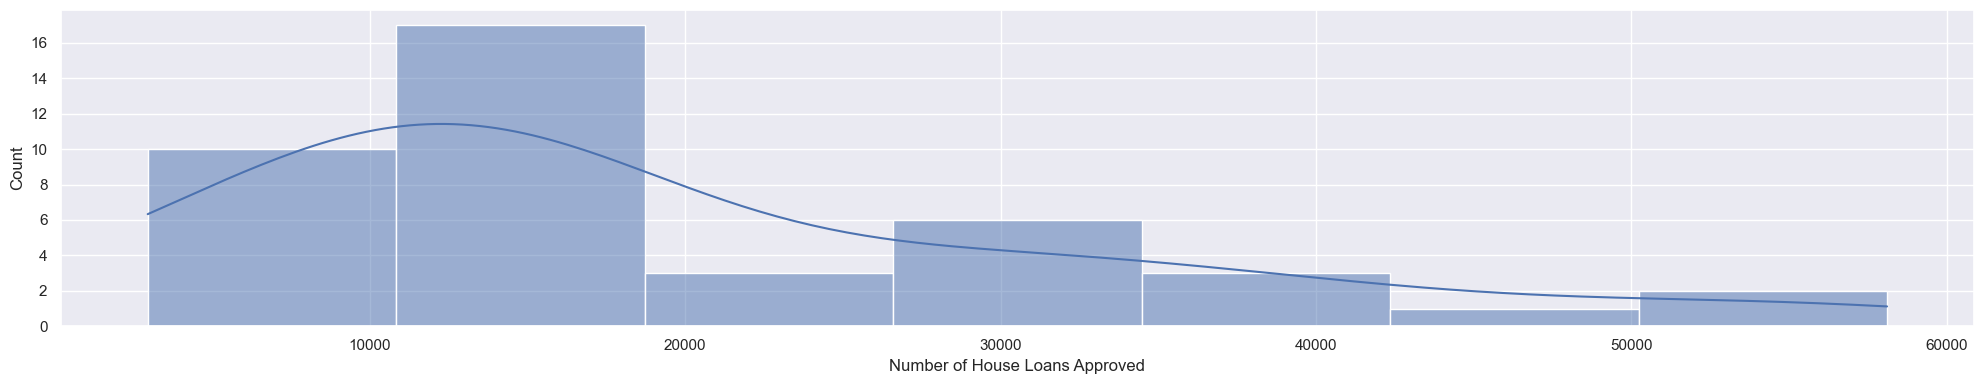

In [79]:
# Set a grey background
sns.set(style="darkgrid")

#Plot data
sns.histplot(data=newhouse_merge, x="Number of House Loans Approved", kde=True)
plt.show()

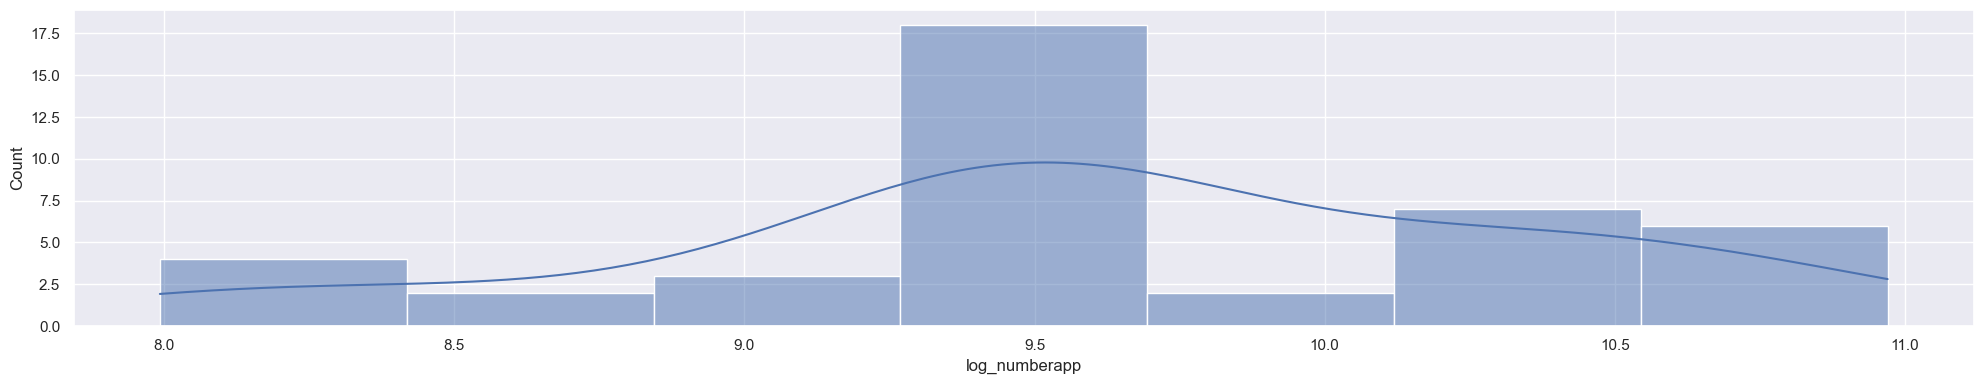

In [80]:
#Prices tend to be positively skewed, therefore log was applied to prices in order to make it looks closer to the bell curve 
newhouse_merge["log_numberapp"] = np.log(newhouse_merge["Number of House Loans Approved"])

#Plot result
sns.histplot(data=newhouse_merge, x="log_numberapp", kde=True)
plt.show()

In [81]:
# Find estimates:
mu_hat = newhouse_merge["log_numberapp"].mean()
sigma_hat = newhouse_merge["log_numberapp"].std()

print(mu_hat)
print(sigma_hat)

9.623820567602333
0.759456848121272


We can model $X = \log(number approved) \sim N(\mu = 9.624, \sigma = 0.759)$.

Let's plot the data, with this Normal on top:

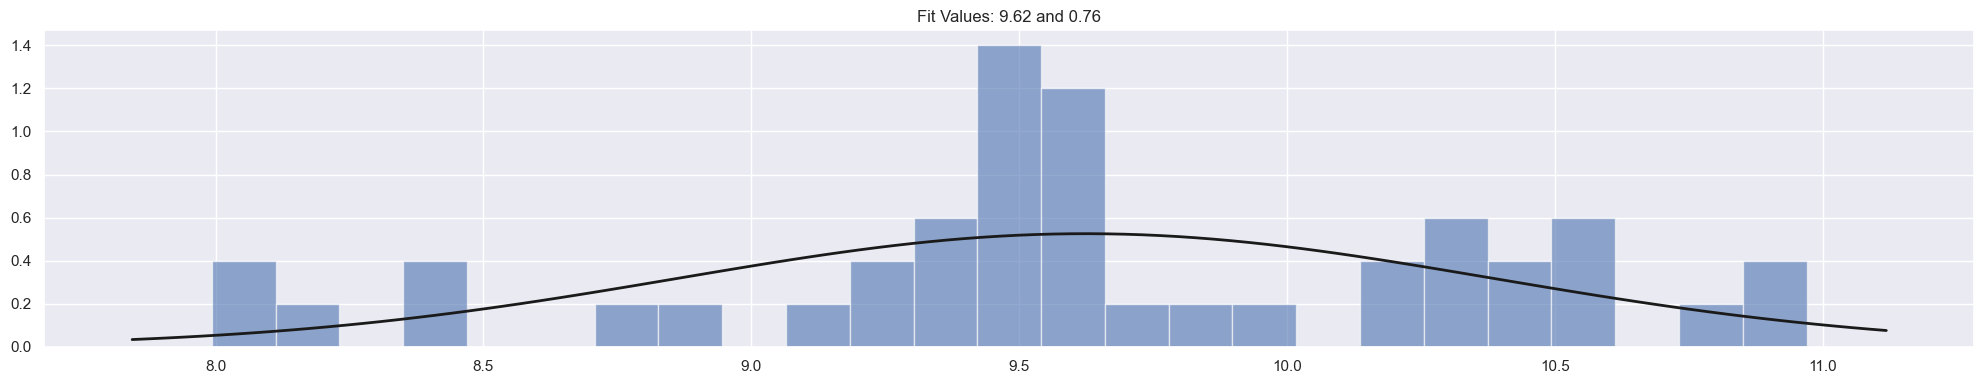

In [82]:
from scipy.stats import norm

# Generate some data for this demonstration.
data_stat = newhouse_merge["log_numberapp"]
  
# Plot histogram
plt.hist(data_stat, bins=25, density=True, alpha=0.6, color='b')
  
# Plot PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_hat, sigma_hat)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_hat, sigma_hat)
plt.title(title)
  
plt.show()

#Code adapted from: 05/04/23 Statistics for DA class and https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

Now you can use this distribution to answer questions (being careful to turn questions into the log scale, or answers back to the natural scale if needed) such as:
- What is the probability that the number of house loans approved is more than 10000 a year?

In [83]:
# For example:
# P(Number of House Loans Approved < 10000) = P(X < log(10000)) =
from scipy.stats import norm
norm.cdf(np.log(10000), mu_hat, sigma_hat)

0.29306867960418054

<b>End of notebook.